In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

# Using Plyplot from Matplotlib Module

In [5]:
x = np.random.normal(size=400)

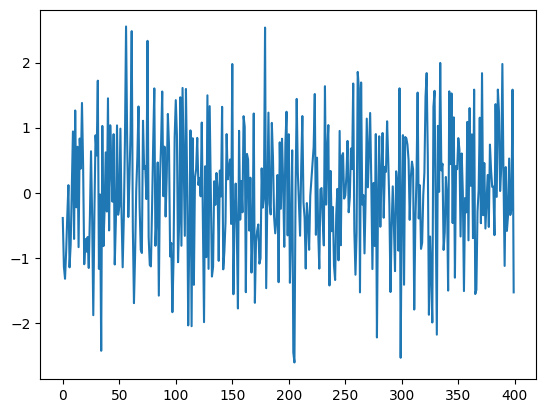

In [6]:
plt.plot(x);

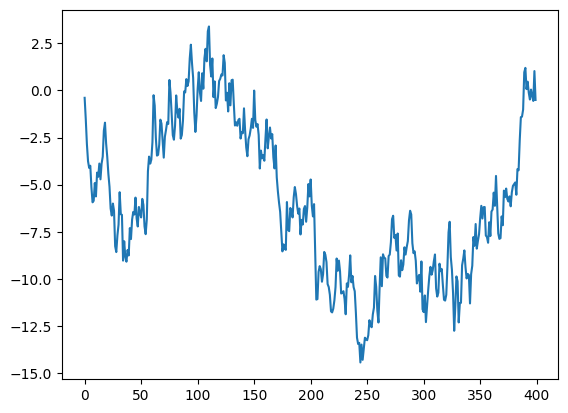

In [7]:
plt.plot(x.cumsum());

In [8]:
plt.style.use('fivethirtyeight')

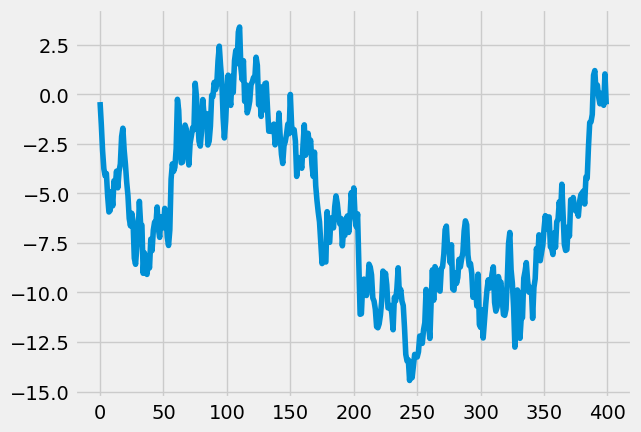

In [9]:
plt.plot(x.cumsum());

In [10]:
plt.style.use('seaborn-v0_8-poster')

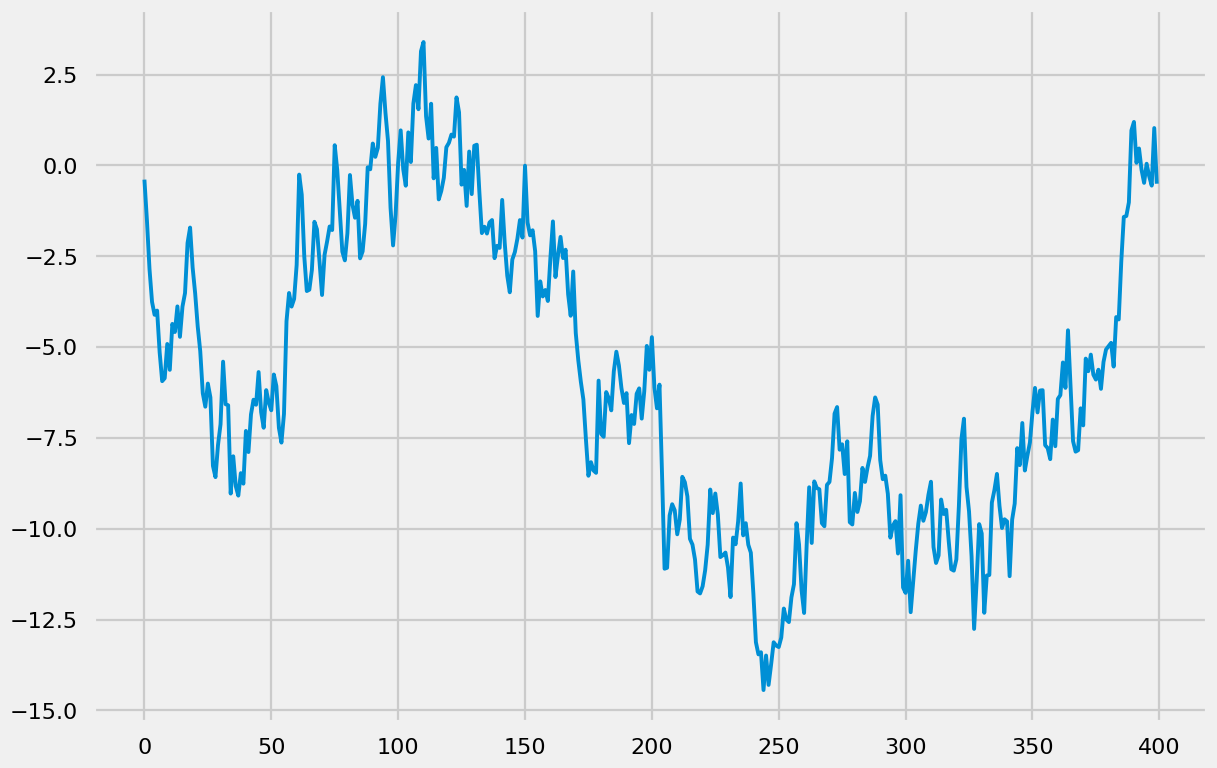

In [11]:
plt.plot(x.cumsum());

In [12]:
plt.style.use('tableau-colorblind10')

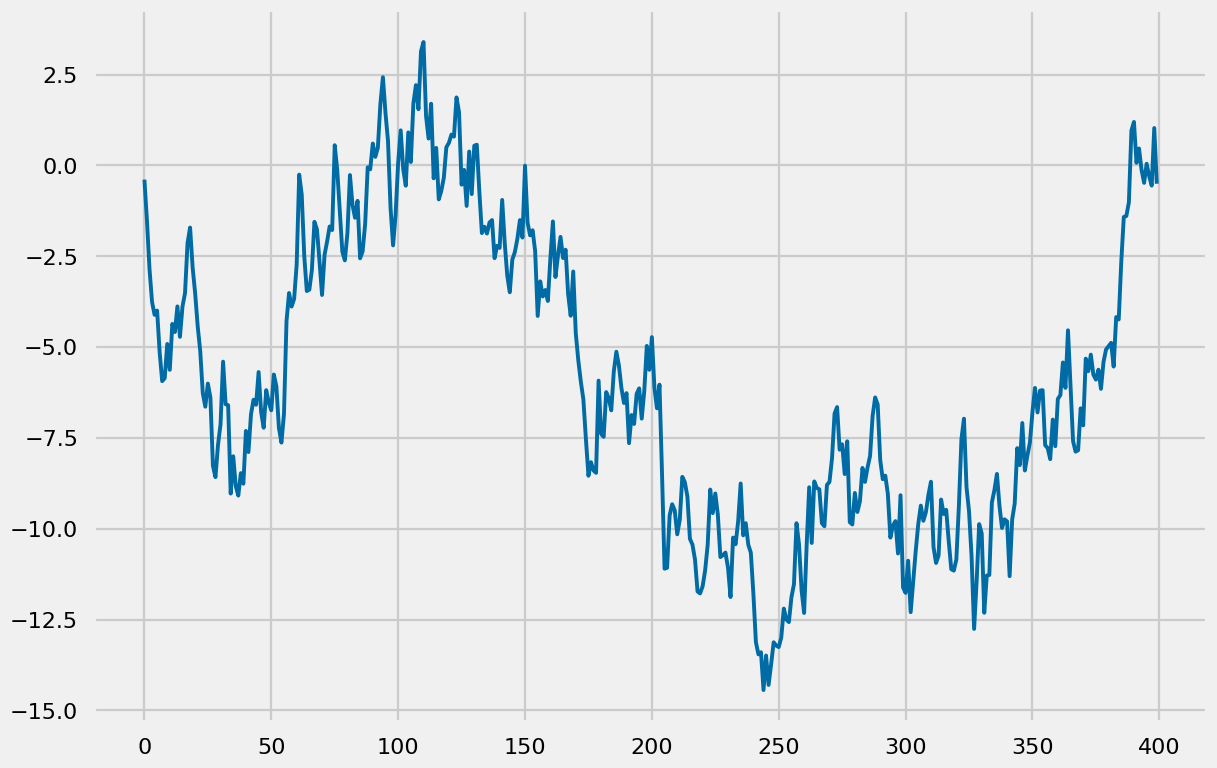

In [13]:
plt.plot(x.cumsum());

In [14]:
plt.style.use('Solarize_Light2')

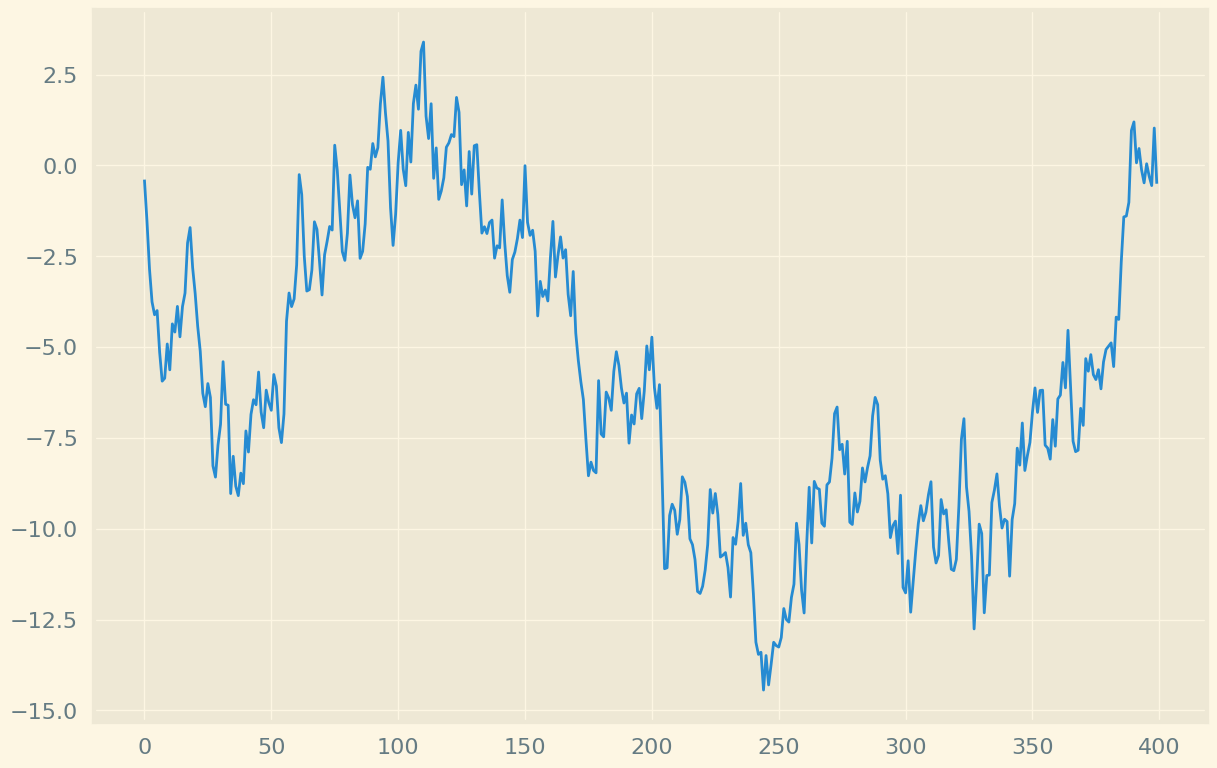

In [15]:
plt.plot(x.cumsum());

In [16]:
plt.style.use('default')

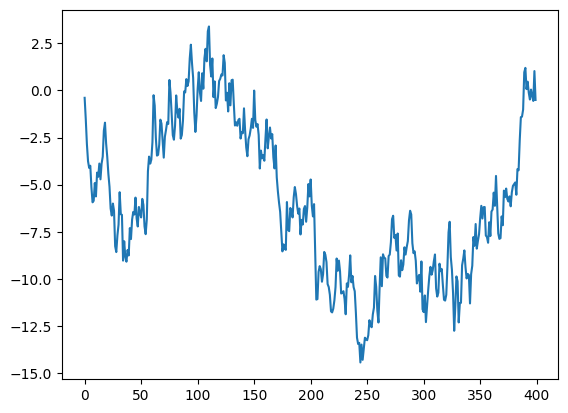

In [17]:
plt.plot(x.cumsum());

In [18]:
plt.style.use('Solarize_Light2')

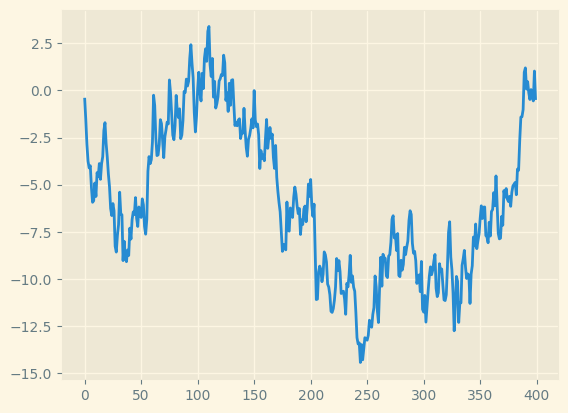

In [19]:
plt.plot(x.cumsum());

In [20]:
x = np.random.normal(size=1000)
y = np.random.normal(size=1000)

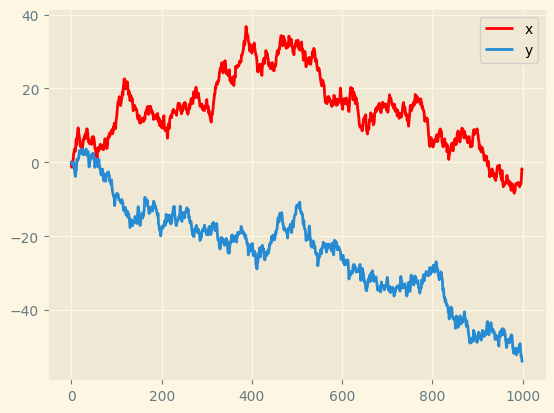

In [21]:
plt.plot(x.cumsum(), color='red',label='x')
plt.plot(y.cumsum(), label='y')
plt.legend();

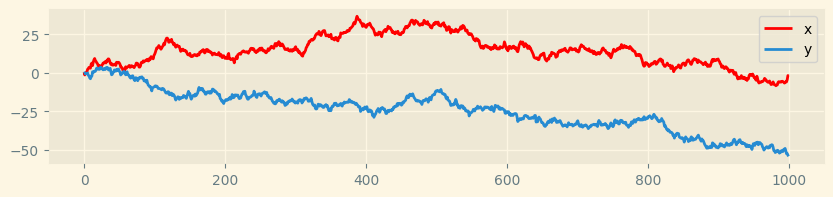

In [22]:
figure, ax= plt.subplots()
ax.plot(x.cumsum(), color='red',label='x')
ax.plot(y.cumsum(), label='y')
ax.legend();

figure.set_size_inches(10,2)

# Line Graphs

In [23]:
brent = pd.read_csv('https://andybek.com/pandas-oil')

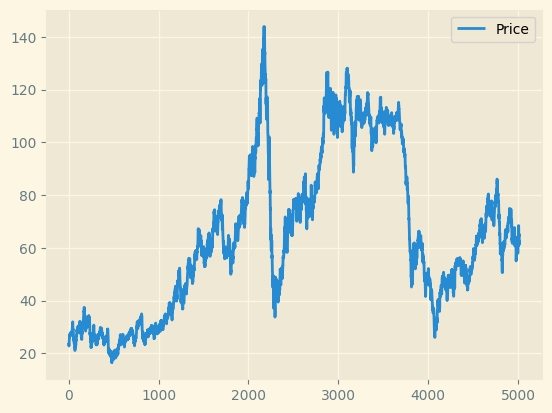

In [24]:
brent.plot();

In [25]:
tech = pd.read_csv('https://andybek.com/pandas-tech',index_col=0,parse_dates=True)

In [26]:
fb = tech.loc[tech.name == 'FB','close'].rename('Facebook')
msft = tech.loc[tech.name == 'MSFT','close'].rename('Microsoft')
aapl = tech.loc[tech.name == 'AAPL','close'].rename('Apple')

In [27]:
df = pd.concat([fb,msft,aapl],axis=1)

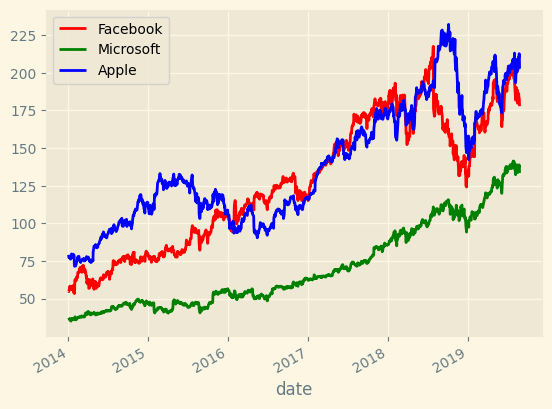

In [28]:
df.plot(color=['red', 'green', 'blue']);

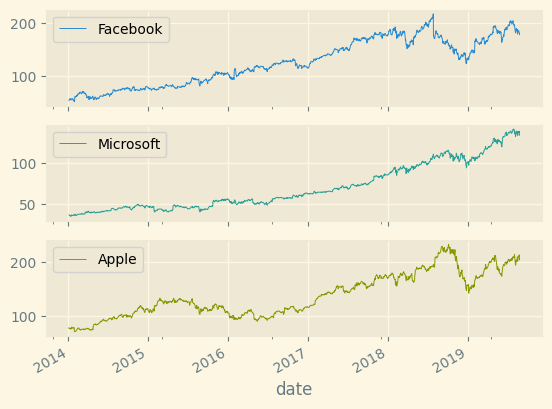

In [29]:
df.plot(subplots=True,linewidth=0.7);

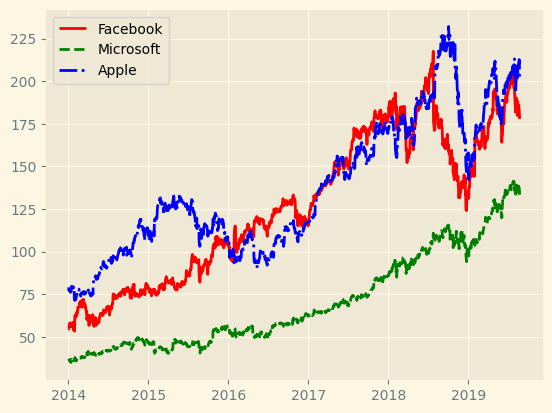

In [30]:
fig, ax = plt.subplots()
linestyles = ['-', '--', '-.']
colors = ['red', 'green', 'blue']

for i, col in enumerate(df.columns):
    ax.plot(df.index, df[col], color=colors[i], linestyle=linestyles[i], label=col)

ax.legend()
plt.show()

# Bar Charts

In [31]:
boston = pd.read_csv('https://andybek.com/pandas-marathon')

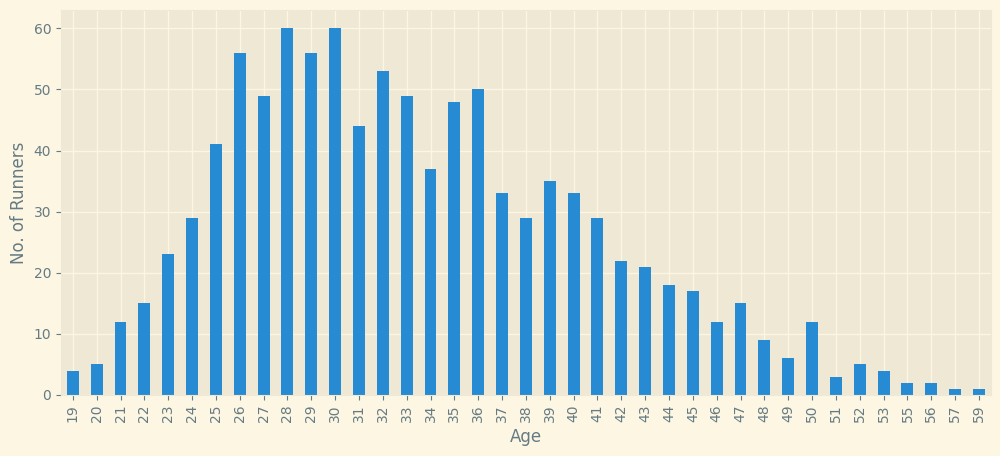

In [32]:
ax = boston.Age.value_counts().sort_index().plot(kind='bar',figsize=(12,5))
ax.set_xlabel('Age')
ax.set_ylabel('No. of Runners');

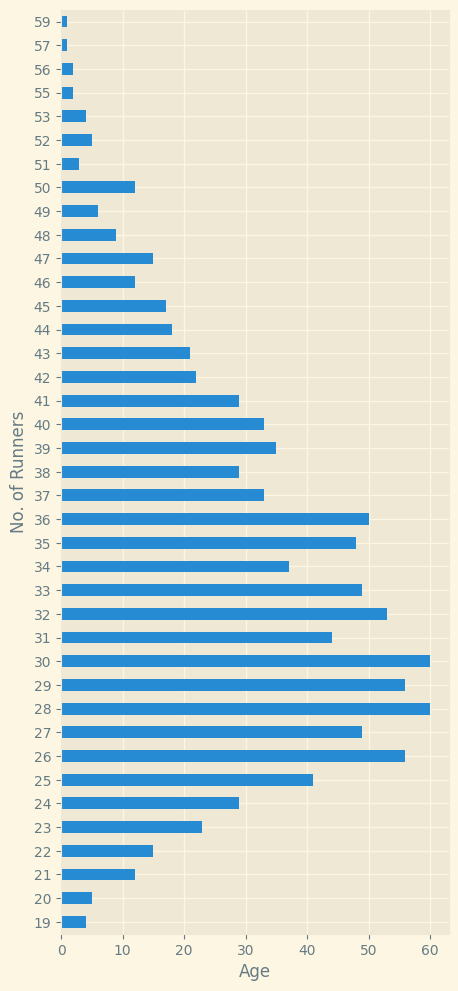

In [33]:
ax = boston.Age.value_counts().sort_index().plot(kind='barh',figsize=(5,12))
ax.set_xlabel('Age')
ax.set_ylabel('No. of Runners');

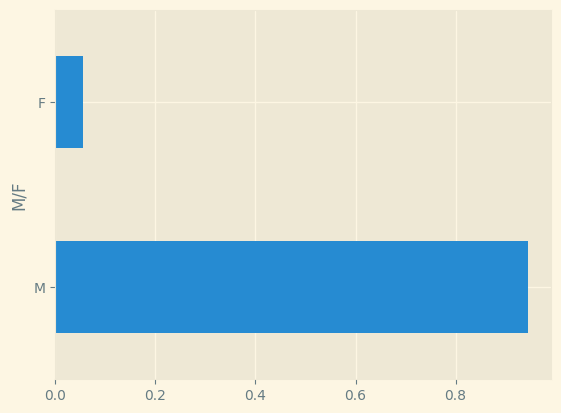

In [34]:
#marathon runners by Gender - by percentages
boston['M/F'].value_counts(normalize=True).plot(kind='barh');

# Pie Charts

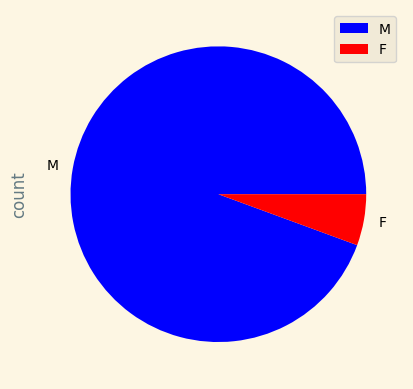

In [35]:
boston['M/F'].value_counts().plot(kind='pie',colors=['blue','red'],legend=True);

In [36]:
games = pd.read_csv('https://andybek.com/pandas-games')

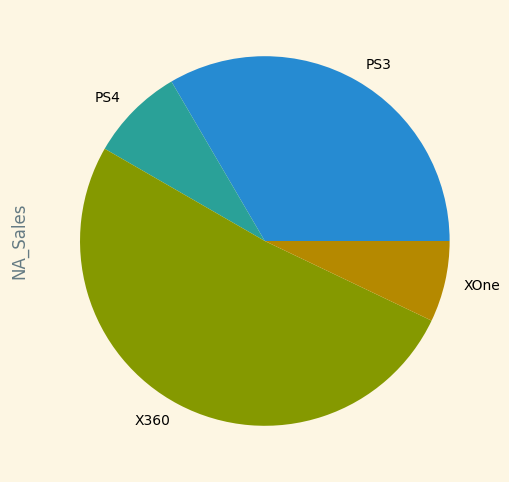

In [37]:
games.groupby('Platform').NA_Sales.sum().plot(kind='pie',figsize=(6,6));

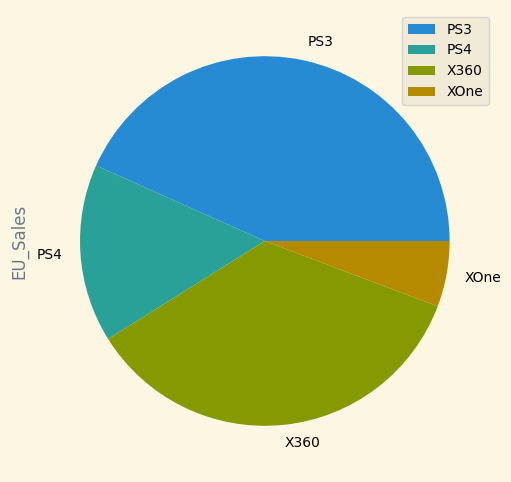

In [38]:
games.groupby('Platform').agg({'EU_Sales': 'sum'}).plot(kind='pie', y='EU_Sales', figsize=(6,6));

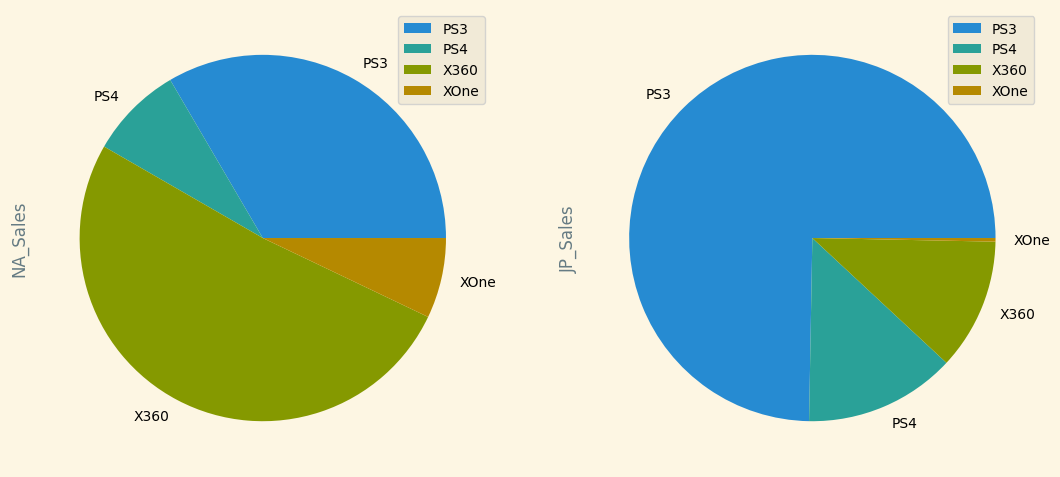

In [39]:
games.loc[:,['NA_Sales','JP_Sales','Platform']].groupby('Platform').sum().plot(kind='pie',subplots=True,figsize=(13,10));

# Histograms

In [40]:
drinks = pd.read_csv('https://andybek.com/pandas-drinks')

In [41]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,NaN,NaN,NaN,NaN
1,Albania,89.0,132.0,54.0,4.9
2,Algeria,25.0,NaN,14.0,0.7
3,Andorra,245.0,138.0,312.0,12.4
4,Angola,217.0,57.0,45.0,5.9


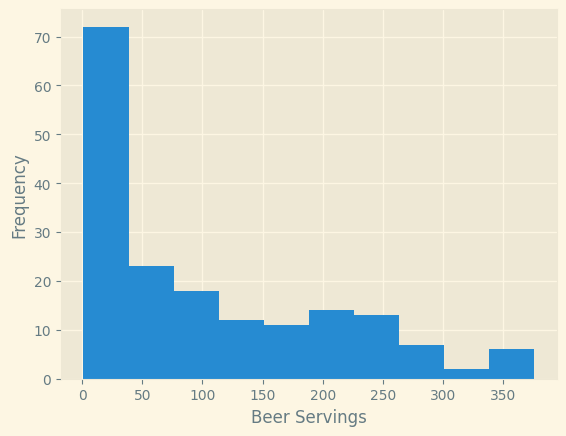

In [42]:
ax = drinks.beer_servings.plot(kind='hist');
ax.set_xlabel('Beer Servings');

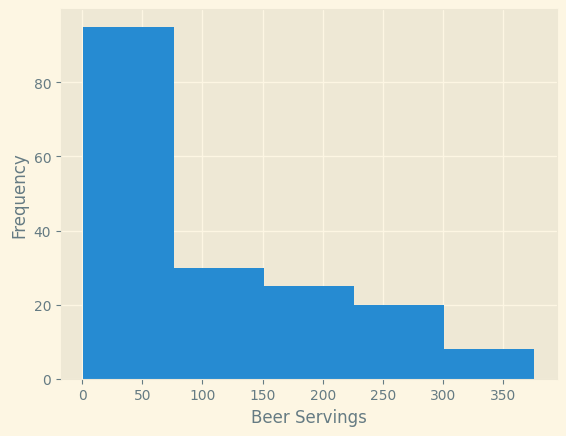

In [43]:
ax = drinks.beer_servings.plot(kind='hist',bins=5);
ax.set_xlabel('Beer Servings');

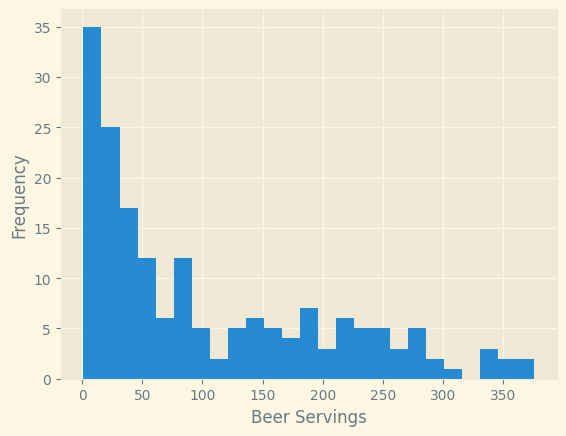

In [44]:
ax = drinks.beer_servings.plot(kind='hist',bins=25);
ax.set_xlabel('Beer Servings');

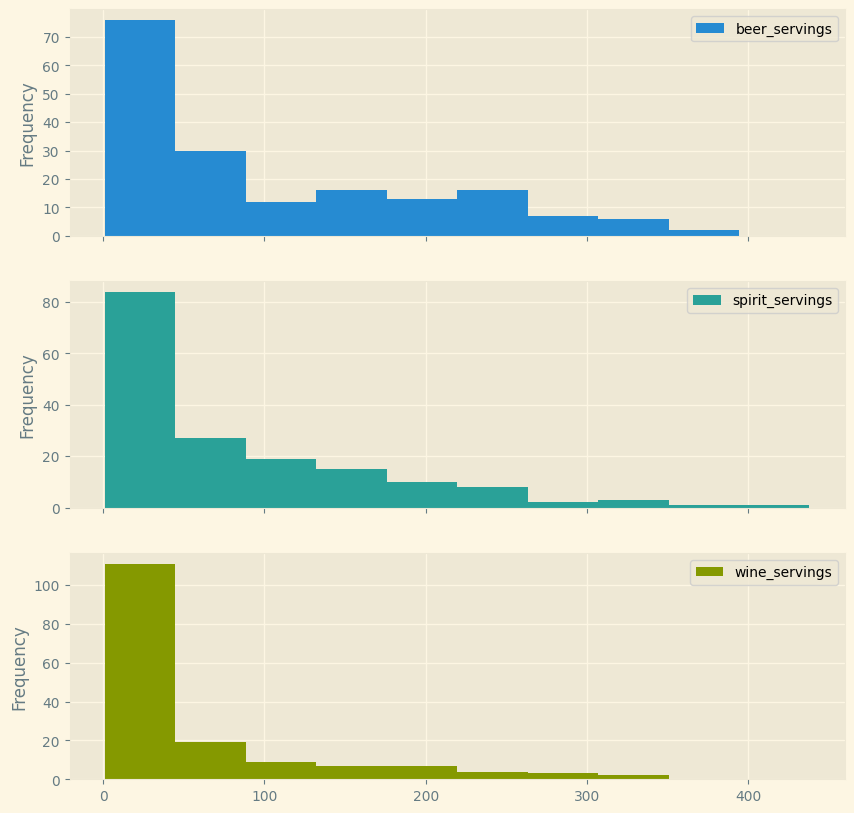

In [45]:
drinks.loc[:,['beer_servings','spirit_servings','wine_servings']].plot(kind='hist',figsize=(10,10),subplots=True);

# Scatter Plots

In [46]:
sat = pd.read_csv('https://andybek.com/pandas-sat')

In [47]:
sat.head()

,School Name,Borough,Student Enrollment,Percent Tested,SAT Section,Score
0,A. Philip Randolph Campus High School,Manhattan,1354,74.00%,Math,459
1,A. Philip Randolph Campus High School,Manhattan,1354,74.00%,Reading,453
2,A. Philip Randolph Campus High School,Manhattan,1354,74.00%,Writing,447
3,Abraham Lincoln High School,Brooklyn,2341,54.90%,Math,441
4,Abraham Lincoln High School,Brooklyn,2341,54.90%,Reading,422


In [48]:
sat_scores_by_school = sat.pivot_table(index='School Name', columns='SAT Section', values='Score')
display(sat_scores_by_school.head())

SAT Section,Math,Reading,Writing
School Name,,,
A. Philip Randolph Campus High School,459.0,453.0,447.0
ACORN Community High School,379.0,395.0,385.0
Abraham Lincoln High School,441.0,422.0,422.0
Academy for Careers in Television and Film,444.0,458.0,444.0
Academy for College Preparation and Career Exploration (College Board),386.0,397.0,393.0


In [49]:
math = sat[sat['SAT Section']=='Math'].Score.reset_index(drop=True)
reading = sat[sat['SAT Section']=='Reading'].Score.reset_index(drop=True)
writing = sat[sat['SAT Section']=='Writing'].Score.reset_index(drop=True)

In [50]:
scores = pd.concat([math,reading,writing],axis=1)
scores.columns = ['Math','Reading','Writing']

In [51]:
scores

,Math,Reading,Writing
0,459,453,447
1,441,422,422
2,444,458,444
3,386,397,393
4,381,397,390
...,...,...,...
370,484,491,487
371,496,481,473
372,478,465,472
373,483,464,477


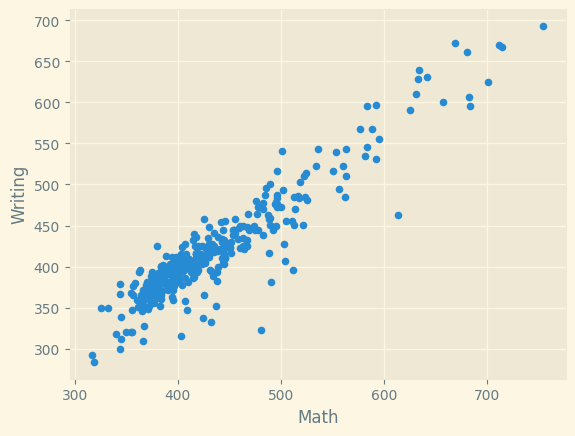

In [52]:
scores.plot(kind='scatter',x='Math',y='Writing');

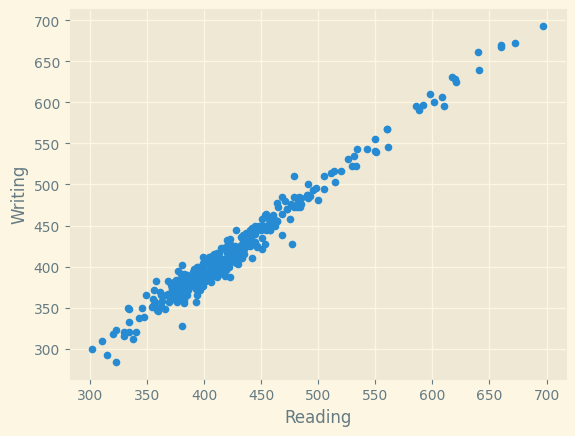

In [53]:
scores.plot(kind='scatter',x='Reading',y='Writing');

# Using Seaborn

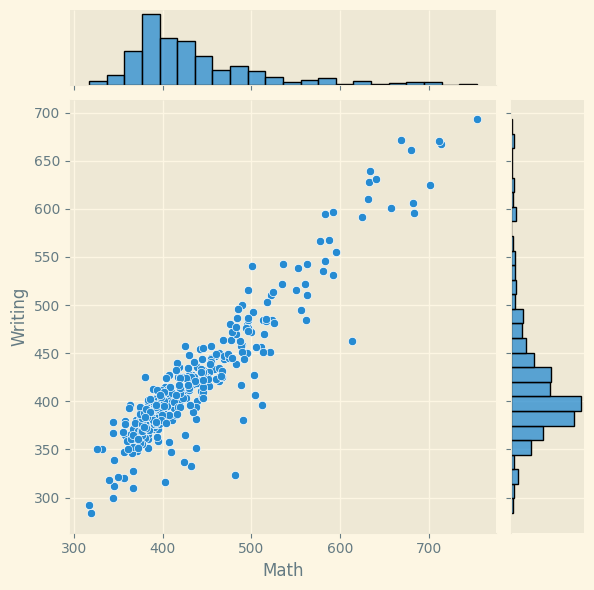

In [54]:
sns.jointplot(x='Math', y='Writing', data=scores, kind='scatter');

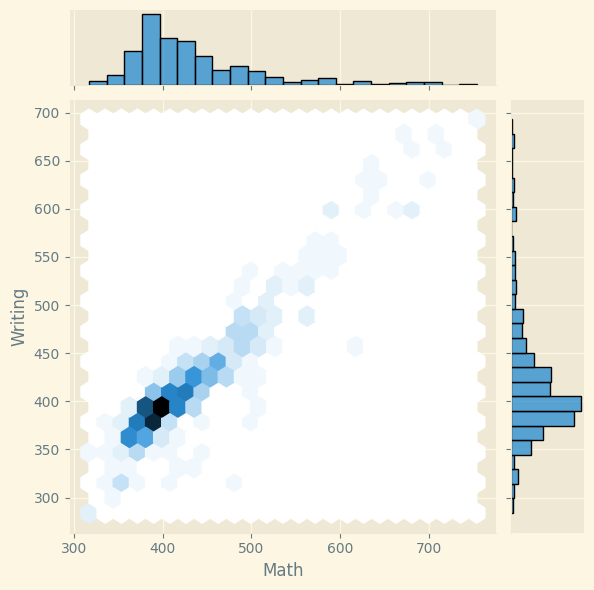

In [55]:
sns.jointplot(x='Math', y='Writing', data=scores, kind='hex'); #Hexagonal binning

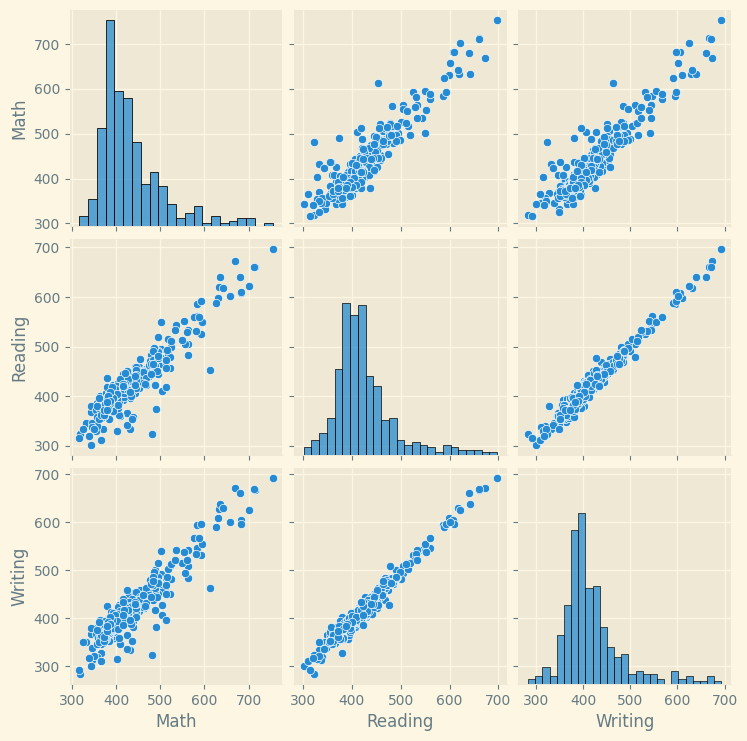

In [56]:
sns.pairplot(scores);

# Skill Challenge

In [57]:
#Starting with games dataset create a pie plot that breaks down total game sales (Global_Sales) by gaming console (Platform).

In [59]:
games.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
1,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
2,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
4,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64


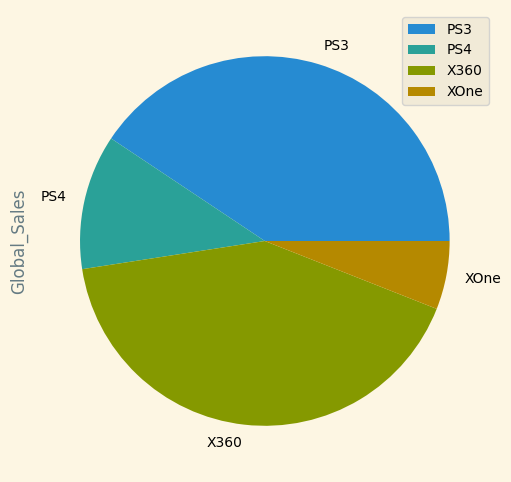

In [61]:
games.groupby('Platform').agg({'Global_Sales': 'sum'}).plot(kind='pie', y='Global_Sales', figsize=(6,6));

In [62]:
#From the games dataset create a smaller dataframe that contains total Global_Sales across Platforms from all releases in sports Genre. Set Name as the index of this new dataframe and assign it to the variable sports_games.

In [94]:
sports_games = games.loc[games.Genre == 'Sports',['Name','Global_Sales']].groupby('Name').sum()

In [95]:
sports_games

,Global_Sales
Name,
2010 FIFA World Cup South Africa,2.09
2014 FIFA World Cup Brazil,1.18
After Hours Athletes,0.12
All-Pro Football 2K8,0.41
Amped 3,0.16
...,...
Your Shape: Fitness Evolved,1.33
Your Shape: Fitness Evolved 2012,1.17
Zumba Fitness,2.98


In [96]:
#Using the sports_games dataframe create a bar chart of the Top 20 best selling games. How does the difference between 1st and the 10th compare between 11th and 20th?

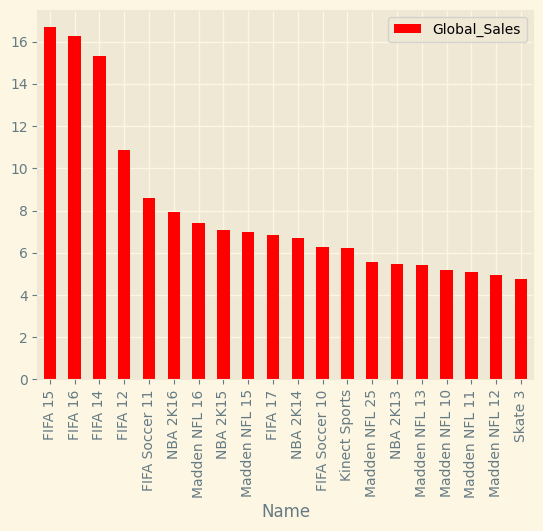

In [98]:
sports_games.nlargest(20,'Global_Sales').plot(kind='bar',color='red');